In [1]:
import os 
os.environ['http_proxy']="http://172.17.0.1:7890"
os.environ['https_proxy']="http://172.17.0.1:7890"
os.environ['all_proxy']="http://172.17.0.1:7890"
import foolbox as fb
import numpy as np
import cv2
import torch
import torchvision
from pytorchcv.model_provider import get_model as ptcv_get_model
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms import transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import copy

In [30]:
#import model
model = ptcv_get_model('resnet110_cifar10',pretrained=True)
#load attacked data
cifar_adv = torch.load("./advsamples/advCifarData-1-L2-CW.pkl")
cifar_labs = torch.load("./advsamples/advCifarLabel-1-L2-CW.pkl")

In [31]:
preprocessing = dict(mean=[0.491, 0.482, 0.447], std=[0.202, 0.199, 0.201], axis=-3)
model= model.eval()
fmodel = fb.PyTorchModel(model,bounds=(0,1),preprocessing=preprocessing)

In [32]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
fb.accuracy(fmodel,cifar_adv,cifar_labs)

0.027000000700354576

In [33]:
def get_single_mask(num):
    x_b = np.zeros((32,32))

    for i in range(num):
        x_axis = np.random.randint(1, 31)
        y_axis = np.random.randint(1, 31)
        case_radom = np.random.randint(1, 5)
        
        if (case_radom == 1) :
            x_b[x_axis][y_axis] = 1
        
        elif (case_radom == 2) :
            x_b[x_axis][y_axis+1] = 1
        
        elif (case_radom == 3) :
            x_b[x_axis+1][y_axis] = 1
        
        elif (case_radom == 4) :
            x_b[x_axis+1][y_axis+1] = 1
    return x_b
try_times = 11

def get_masks(num):

    mask = np.expand_dims(get_single_mask(num), axis = 0)
    for k in range(try_times-1):
        mask2 = np.expand_dims(get_single_mask(num), axis = 0)
        mask = np.concatenate((mask, mask2))
    
    # print(mask.shape) ->  (11, 224, 224)
    return mask

def reConstruct(img):
    img = img/255
    img = np.transpose(img,[2,0,1])
    img = np.expand_dims(img,axis=0)
    img = torch.tensor(img).type(torch.FloatTensor).to(device)
    return img

In [36]:
#step 1 fetch adv_samples and preprocessing

mask_str = [150]
vec_list = []
label_list = []
for strength in mask_str:
    attack_failures=0
    recover_success=0
    is_adv=0
    for i in range(len(cifar_adv)):
        img_adv1=copy.deepcopy(cifar_adv[i])
        img = img_adv1.unsqueeze(0)
        true_labs = cifar_labs[i]
        true_labs = true_labs.cpu().detach().numpy()
        src = img_adv1.cpu().detach().numpy()
        src = np.transpose(src,[1,2,0])
        ori = fmodel(img)
        ori = ori[0].cpu().detach().numpy()

    #step 2 Fade-EnR opreation

        mask = get_masks(strength)
        for i in range(try_times):
            dst_adv = cv2.inpaint(src, np.ubyte(np.expand_dims(mask[i],axis=2)), 3, cv2.INPAINT_TELEA)
    #step 3 recover cvformat to torch
            new = reConstruct(dst_adv)
            yhat_vec = fmodel(new)
            yhat = yhat_vec[0].cpu().detach().numpy()
            ori = np.concatenate((ori,yhat))     
        vec_list.append(ori)
print(len(vec_list))
#             _,old_labs = fmodel(img).max(axis=-1)
#             _,new_labs=fmodel(new).max(axis=-1)
#             if new_labs==true_lab and old_labs!=new_labs:
#                 recover_success+=1
#                 break
#             elif old_labs!=new_labs:
#                 is_adv+=1
#                 break
#             else:
#                 continue
#     print("mask strength is:",strength)
#     print("detect ratio:",(is_adv+recover_success)/(len(cifar_adv)-attack_failures))
#step 4 convert list to ndarray
vec = np.array(vec_list)

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32, 32)
(1, 3, 32,

In [37]:
#generate benigh samples vector
ben_data = torch.load("test1Cifar.pkl")
ben = torch.utils.data.DataLoader(ben_data, batch_size=8, shuffle=False)

tempStore = torch.empty([0, 3, 32, 32]).to(device)
for data,lab in ben:
    data = data.to(device)
    tempStore = torch.cat((tempStore,data),0)
#     print(tempStore.shape)
    
mask_str = [150]
ben_vec_list = []
ben_label_list = []
for strength in mask_str:
    attack_failures=0
    recover_success=0
    is_adv=0
    for i in range(len(tempStore)):
        img_adv1=copy.deepcopy(tempStore[i])
        img = img_adv1.unsqueeze(0)
        src = img_adv1.cpu().detach().numpy()
        src = np.transpose(src,[1,2,0])
        src = np.ubyte(src*255)
        
        ori = fmodel(img)
        ori = ori[0].cpu().detach().numpy()
        
        #step 2 EnR opreation

        mask = get_masks(strength)
        for i in range(try_times):
            dst_adv = cv2.inpaint(src, np.ubyte(np.expand_dims(mask[i],axis=2)), 3, cv2.INPAINT_TELEA)
        #step 3 recover cvformat to torch
            new = reConstruct(dst_adv)
            yhat_vec = fmodel(new)
            yhat = yhat_vec[0].cpu().detach().numpy()
            ori = np.concatenate((ori,yhat))
        ben_vec_list.append(ori)
print(len(ben_vec_list))

#step 4 prepare ben_vec
ben_vec = np.array(ben_vec_list)
ben_vec.shape

1000


(1000, 120)

In [28]:
y_test = np.concatenate((np.zeros(1000),np.ones(500)))
x_test = np.concatenate((ben_vec,X_test))
print(f"FPR rates:{svc_clf.score(ben_vec,np.zeros(1000))}")
print(f"Detection rates:{svc_clf.score(x_test,y_test)}")

FPR rates:0.998
Detection rates:0.9986666666666667


In [41]:
X_train = np.concatenate((vec[:800],ben_vec))
y_train = np.concatenate((np.ones(800),np.zeros(1000)))
X_test = vec[800:1000]
y_test = np.ones(200)

In [42]:
from sklearn.svm import SVC
svc_clf = SVC(kernel = 'rbf', gamma = 0.05, C = 5)
svc_clf.fit(X_train,y_train)
svc_clf.score(X_test,y_test)

1.0

In [16]:
svc_clf.predict(X_test[0:10])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

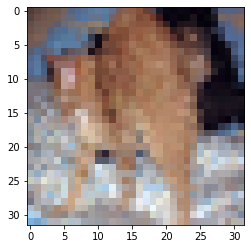

In [509]:
plt.imshow(dst_adv,cmap='Greys_r')